In [176]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("base.csv")
df.head(4)

,Unnamed: 0,edad,hambre,solo,insomnio,sui,activo,bici,edfis,seden,...,Escuela,NBI,NBI_centrada,Promedio_Ed_Padres,Promedio_Ed_Padres_Esc,maxedcat,PromedioFlia,PromedioEsc,TercilEscuela,maxedcat2
0,1,1,2,5,5,1,8,8,3,6,...,119,8.19,-3.23,4.0,3.451807,Alta,4.0,3.458434,Media,Alto
1,2,1,1,1,1,2,6,3,1,2,...,119,8.19,-3.23,3.0,3.451807,Media,3.0,3.458434,Media,Medio
2,3,2,1,1,2,2,7,6,3,2,...,119,8.19,-3.23,4.0,3.451807,Media,4.0,3.458434,Media,Medio
3,4,1,1,2,3,2,3,3,3,1,...,119,8.19,-3.23,1.5,3.451807,Baja,1.5,3.458434,Media,Bajo


In [177]:
frutas = df.groupby(["Provincia","maxedcat2","TercilEscuela"])["QNfrutas"]
frutas = frutas.apply(lambda row: row.sum() / row.count())
frutas = frutas.reset_index(level=[0])
frutas

Provincia  QNfrutas
maxedcat2 TercilEscuela                        
Alto      Alta           Buenos Aires  0.199203
          Baja           Buenos Aires  0.202899
          Media          Buenos Aires  0.214286
Bajo      Alta           Buenos Aires  0.250000
          Baja           Buenos Aires  0.220000
...                               ...       ...
          Baja                Tucuman  0.121429
          Media               Tucuman  0.116788
Medio     Alta                Tucuman  0.052632
          Baja                Tucuman  0.159483
          Media               Tucuman  0.126253

[216 rows x 2 columns]

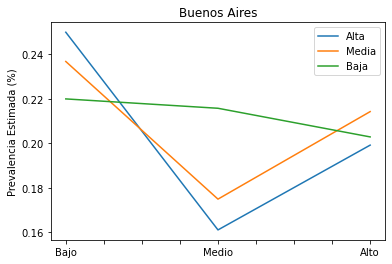

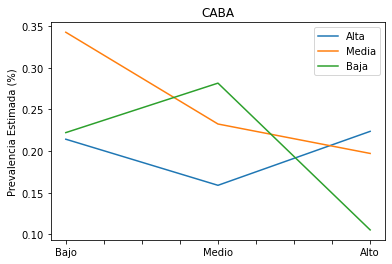

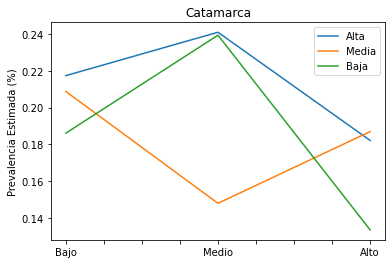

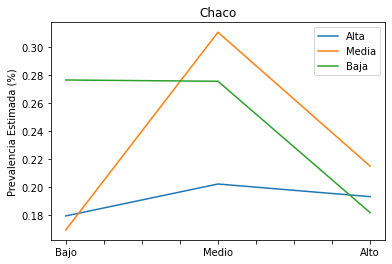

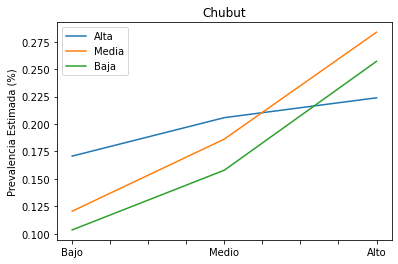

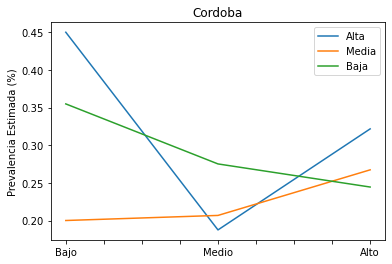

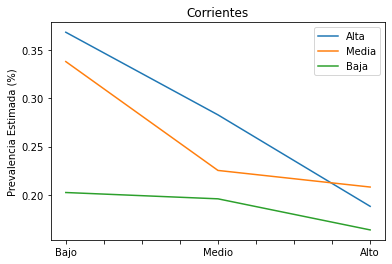

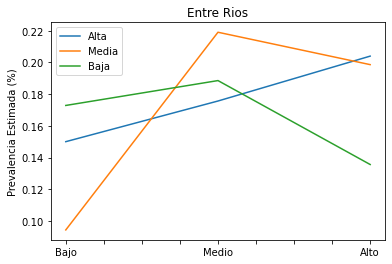

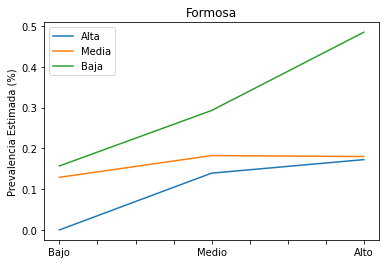

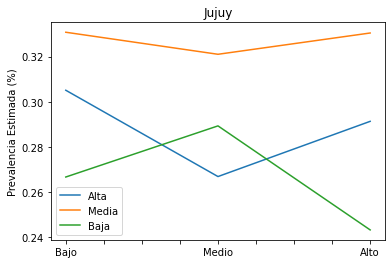

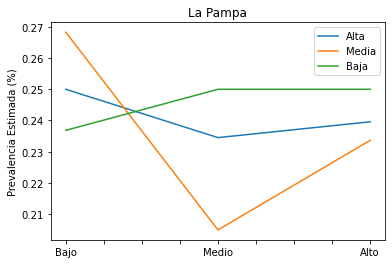

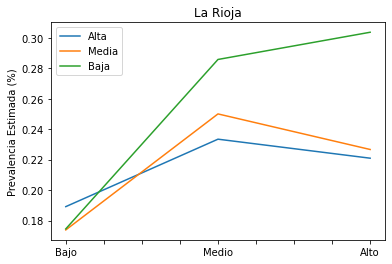

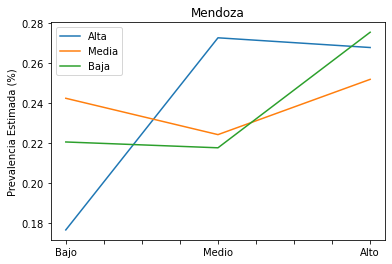

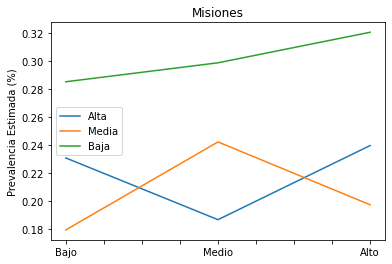

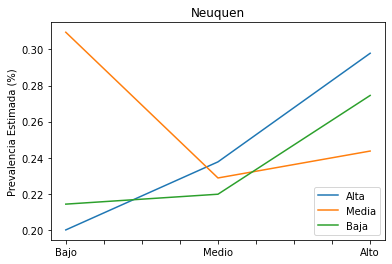

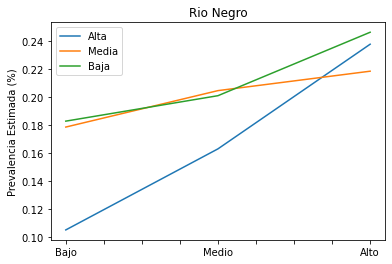

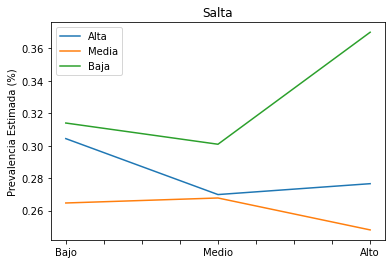

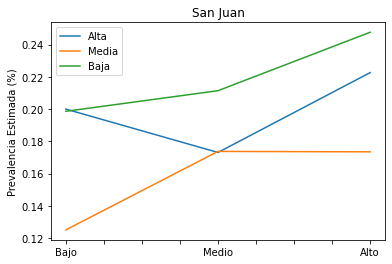

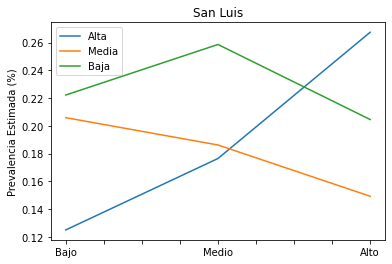

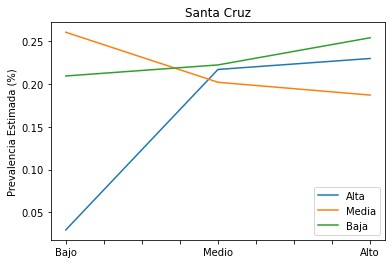

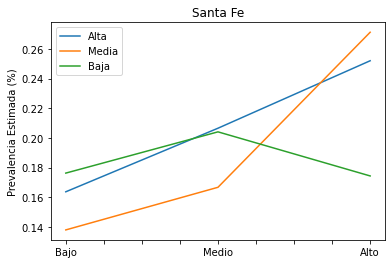

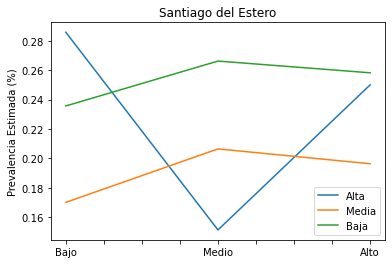

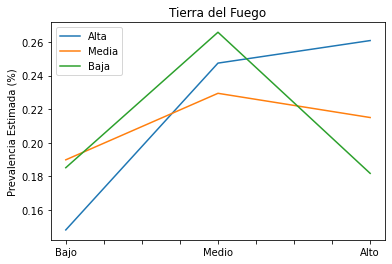

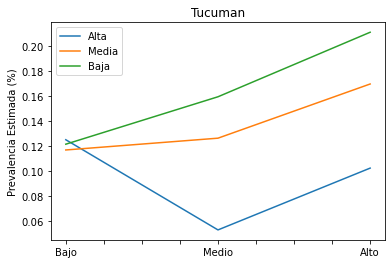

In [178]:
provincias = df.groupby("Provincia")
for provincia, grp in provincias:
    province = frutas[frutas["Provincia"] == provincia]
    province = province.reset_index(level=[1])
    plot = pd.concat([
        province[province["TercilEscuela"] == "Alta"]["QNfrutas"].rename("Alta"),
        province[province["TercilEscuela"] == "Media"]["QNfrutas"].rename("Media"),
        province[province["TercilEscuela"] == "Baja"]["QNfrutas"].rename("Baja")],
        axis=1).reindex(["Bajo","Medio","Alto"]).plot(title=provincia)
    plot.set(xlabel="", ylabel="Prevalencia Estimada (%)")